# Simulation with default parameters, no hemoglobin reaction and periodic boundary conditions on slab mesh

The following notebook outlines a sample simulation of the perfusion and gas exchange model on a periodic mesh mimicking an infinite sheet positioned between alveoli (an approximation to the 2D problem, collapsing the $\boldsymbol{\hat{z}}$ axis). We start without considering hemoglobin effects.

Import necessary packages and add the working directory to the system path.

In [1]:
import sys
import os
import dolfin
import pandas as pd
import matplotlib.pyplot as plt
from ipygany import Scene, PolyMesh, ColorBar, IsoColor
from ipywidgets import Play, IntProgress, link, VBox
plt.style.use('ggplot')
sys.path.append(os.getcwd()[:-6])

Import the model modules.

In [2]:
from src.model import PerfusionGasExchangeModel
from src.params import params
params

{'kappa': 1.5751302,
 'mu': 2.625217e-05,
 'p_max': 12,
 'p_min': 8,
 'd_pla_O2': 1620.0,
 'd_ba_O2': 1000.0000000000001,
 'd_pla_CO2': 1000.0000000000001,
 'd_ba_CO2': 914.0000000000001,
 'beta_O2': 1.269e-21,
 'k_O2': 40,
 'k_prime_O2': 2.85e+21,
 'beta_CO2': 2.5380000000000002e-20,
 'k_CO2': 0.008,
 'k_prime_CO2': 6000000000.0,
 'h_ba': 0.3,
 'p_air_O2': 100,
 'p_air_CO2': 40,
 'p_O2_in': 40,
 'p_CO2_in': 45,
 'c_t': 2.4e-17,
 'c_HbO2_in': 0,
 'c_HbCO2_in': 0}

Set a target folder for `vtk` files.

In [3]:
folder = "periodic-bcs-no-hb-vidal-melo-params"
path = os.path.join("../raw-data", folder)

Instance the model and run simulation.

In [4]:
model = PerfusionGasExchangeModel(folder_path=path, params=params)
model.generate_slab_mesh(
    dims=(200, 6, 6), elems=(133, 4, 4), save=True, periodic=True
)
#model.sim_p(save=True, meshtype="slab")
model.set_u(value=(1000, 0, 0), save=True)
model.sim_sbst(hb=False, save=True)
boundaries = dolfin.File(model.folder_path+'/bnd/bnd.pvd')
boundaries << model.boundaries

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.123e+07 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 2.759e-08 (tol = 1.000e-10) r (rel) = 8.834e-16 (tol = 1.000e-09)
  Newton solver finished in 1 iterations and 1 linear solver iterations.


Read data into CSV files. We take the oxygen partial pressure along the capillary at three different heights ($y$).

In [5]:
middle = pd.read_csv(
    os.path.join('../raw-data/', folder, 'sbst/curve_middle_po2.csv')
)
quarter = pd.read_csv(
    os.path.join('../raw-data/', folder, 'sbst/curve_quarter_po2.csv')
)
top = pd.read_csv(
    os.path.join('../raw-data/', folder, 'sbst/curve_top_po2.csv')
)
o2_no_hb = middle
middlec = pd.read_csv(
    os.path.join('../raw-data/', folder, 'sbst/curve_middle_pco2.csv')
)
quarterc = pd.read_csv(
    os.path.join('../raw-data/', folder, 'sbst/curve_quarter_pco2.csv')
)
topc = pd.read_csv(
    os.path.join('../raw-data/', folder, 'sbst/curve_top_pco2.csv')
)

And we visualize the results

In [6]:
if not os.path.isdir(os.path.join('../results-data/', folder)):
    os.makedirs(os.path.join('../results-data/', folder))

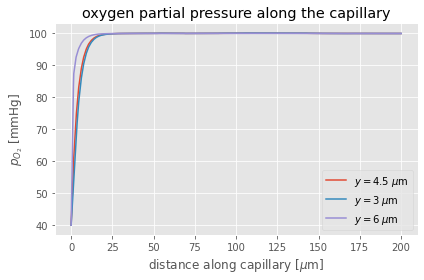

In [7]:
plt.figure()
plt.title('oxygen partial pressure along the capillary')
plt.ylabel(r'$p_{O_2}$ [mmHg]')
plt.xlabel(r'distance along capillary [$\mu$m]')
plt.plot(
    quarter["arc_length"], quarter["p_O2"], label=r'$y=4.5 \; \mu$m'
)
plt.plot(
    middle["arc_length"], middle["p_O2"], label=r'$y=3 \; \mu$m'
)
plt.plot(
    top["arc_length"], top["p_O2"], label=r'$y=6 \; \mu$m'
)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join('../results-data/', folder, 'po2_along_cap.pdf'))

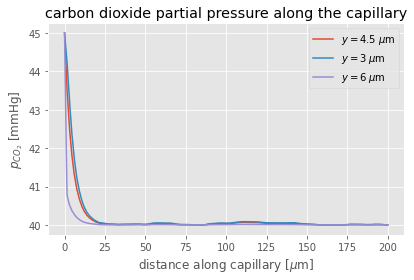

In [8]:
plt.figure()
plt.title('carbon dioxide partial pressure along the capillary')
plt.ylabel(r'$p_{CO_2}$ [mmHg]')
plt.xlabel(r'distance along capillary [$\mu$m]')
plt.plot(
    quarterc["arc_length"], quarterc["p_CO2"], label=r'$y=4.5 \; \mu$m'
)
plt.plot(
    middlec["arc_length"], middlec["p_CO2"], label=r'$y=3 \; \mu$m'
)
plt.plot(
    topc["arc_length"], topc["p_CO2"], label=r'$y=6 \; \mu$m'
)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join('../results-data/', folder, 'pco2_along_cap.pdf'))

Repeat with Hb action.

In [9]:
folder = "periodic-bcs-hb-vidal-melo-params"
path = os.path.join("../raw-data", folder)
model = PerfusionGasExchangeModel(folder_path=path, params=params)
model.generate_slab_mesh(
    dims=(200, 6, 6), elems=(133, 4, 4), save=True, periodic=True
)
#model.sim_p(save=True, meshtype="slab")
model.set_u(value=(1000, 0, 0), save=True)
model.sim_sbst(hb=True, save=True)
boundaries = dolfin.File(model.folder_path+'/bnd/bnd.pvd')
boundaries << model.boundaries

No Jacobian form specified for nonlinear variational problem.Calling FFC just-in-time (JIT) compiler, this may take some time.

Differentiating residual form F to obtain Jacobian J = F'.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.149e+07 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 2.691e+08 (tol = 1.000e-10) r (rel) = 8.546e+00 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 7.498e+08 (tol = 1.000e-10) r (rel) = 2.381e+01 (tol = 1.000e-09)
  Newton iteration 3: r (abs) = 1.633e+08 (tol = 1.000e-10) r (rel) = 5.185e+00 (tol = 1.000e-09)
  Newton iteration 4: r (abs) = 1.399e+09 (tol = 1.000e-10) r (rel) = 4.441e+01 (tol = 1.000e-09)
  Newton iteration 5: r (abs) = 1.710e+10 (tol = 1.000e-10) r (rel) = 5.430e+02 (tol = 1.000e-09)
  Newton iteration 6: r (abs) = 3.074e+10 (tol = 1.000e-10) r (rel) = 9.762e+02 (tol = 1.000e-09)
  Newton iteration 7: 

RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to solve nonlinear system with NewtonSolver.
*** Reason:  Newton solver did not converge because maximum number of iterations reached.
*** Where:   This error was encountered inside NewtonSolver.cpp.
*** Process: 0
*** 
*** DOLFIN version: 2019.1.0
*** Git changeset:  unknown
*** -------------------------------------------------------------------------


In [ ]:
middle = pd.read_csv(
    os.path.join('../raw-data/', folder, 'sbst/curve_middle_po2.csv')
)
quarter = pd.read_csv(
    os.path.join('../raw-data/', folder, 'sbst/curve_quarter_po2.csv')
)
top = pd.read_csv(
    os.path.join('../raw-data/', folder, 'sbst/curve_top_po2.csv')
)
o2_hb = middle
middlec = pd.read_csv(
    os.path.join('../raw-data/', folder, 'sbst/curve_middle_pco2.csv')
)
quarterc = pd.read_csv(
    os.path.join('../raw-data/', folder, 'sbst/curve_quarter_pco2.csv')
)
topc = pd.read_csv(
    os.path.join('../raw-data/', folder, 'sbst/curve_top_pco2.csv')
)
middlehb = pd.read_csv(
    os.path.join('../raw-data/', folder, 'sbst/curve_middle_chbo2.csv')
)
quarterhb = pd.read_csv(
    os.path.join('../raw-data/', folder, 'sbst/curve_quarter_chbo2.csv')
)
tophb = pd.read_csv(
    os.path.join('../raw-data/', folder, 'sbst/curve_top_chbo2.csv')
)
middlehbc = pd.read_csv(
    os.path.join('../raw-data/', folder, 'sbst/curve_middle_chbco2.csv')
)
quarterhbc = pd.read_csv(
    os.path.join('../raw-data/', folder, 'sbst/curve_quarter_chbco2.csv')
)
tophbc = pd.read_csv(
    os.path.join('../raw-data/', folder, 'sbst/curve_top_chbco2.csv')
)

In [ ]:
if not os.path.isdir(os.path.join('../results-data/', folder)):
    os.makedirs(os.path.join('../results-data/', folder))

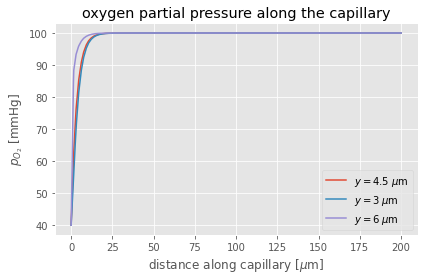

In [ ]:
plt.figure()
plt.title('oxygen partial pressure along the capillary')
plt.ylabel(r'$p_{O_2}$ [mmHg]')
plt.xlabel(r'distance along capillary [$\mu$m]')
plt.plot(
    quarter["arc_length"], quarter["p_O2"], label=r'$y=4.5 \; \mu$m'
)
plt.plot(
    middle["arc_length"], middle["p_O2"], label=r'$y=3 \; \mu$m'
)
plt.plot(
    top["arc_length"], top["p_O2"], label=r'$y=6 \; \mu$m'
)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join('../results-data/', folder, 'po2_along_cap.pdf'))

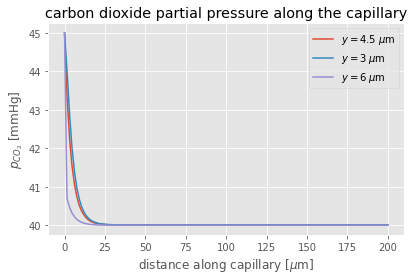

In [ ]:
plt.figure()
plt.title('carbon dioxide partial pressure along the capillary')
plt.ylabel(r'$p_{CO_2}$ [mmHg]')
plt.xlabel(r'distance along capillary [$\mu$m]')
plt.plot(
    quarterc["arc_length"], quarterc["p_CO2"], label=r'$y=4.5 \; \mu$m'
)
plt.plot(
    middlec["arc_length"], middlec["p_CO2"], label=r'$y=3 \; \mu$m'
)
plt.plot(
    topc["arc_length"], topc["p_CO2"], label=r'$y=6 \; \mu$m'
)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join('../results-data/', folder, 'pco2_along_cap.pdf'))

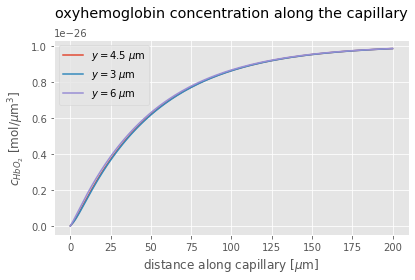

In [ ]:
plt.figure()
plt.title('oxyhemoglobin concentration along the capillary\n')
plt.ylabel(r'$c_{HbO_2}$ [mol/$\mu$m$^3$]')
plt.xlabel(r'distance along capillary [$\mu$m]')
plt.plot(
    quarterhb["arc_length"], quarterhb["c_HbO2"], label=r'$y=4.5 \; \mu$m'
)
plt.plot(
    middlehb["arc_length"], middlehb["c_HbO2"], label=r'$y=3 \; \mu$m'
)
plt.plot(
    tophb["arc_length"], tophb["c_HbO2"], label=r'$y=6 \; \mu$m'
)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join('../results-data/', folder, 'chbo2_along_cap.pdf'))

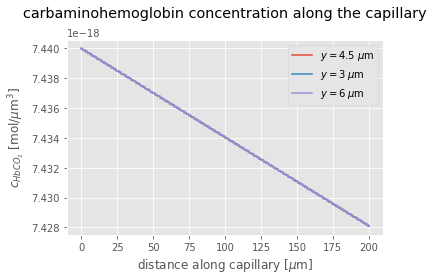

In [ ]:
plt.figure()
plt.title('carbaminohemoglobin concentration along the capillary\n')
plt.ylabel(r'$c_{HbCO_2}$ [mol/$\mu$m$^3$]')
plt.xlabel(r'distance along capillary [$\mu$m]')
plt.plot(
    quarterhbc["arc_length"], quarterhbc["c_HbCO2"], label=r'$y=4.5 \; \mu$m'
)
plt.plot(
    middlehbc["arc_length"], middlehbc["c_HbCO2"], label=r'$y=3 \; \mu$m'
)
plt.plot(
    tophbc["arc_length"], tophbc["c_HbCO2"], label=r'$y=6 \; \mu$m'
)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join('../results-data/', folder, 'chbco2_along_cap.pdf'))

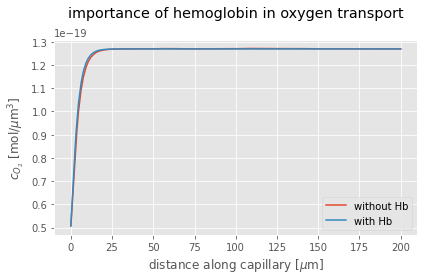

In [ ]:
beta_O2 = model.params["beta_O2"]

plt.figure()
plt.title('importance of hemoglobin in oxygen transport\n')
plt.ylabel(r'$c_{O_2}$ [mol/$\mu$m$^3$]')
plt.xlabel(r'distance along capillary [$\mu$m]')
plt.plot(
    o2_no_hb["arc_length"], beta_O2*o2_no_hb["p_O2"], label=r'without Hb'
)
plt.plot(
    o2_hb["arc_length"], beta_O2*o2_hb["p_O2"] + middlehb["c_HbO2"],
    label=r'with Hb'
)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join('../results-data/', folder, 'hb_comparison.pdf'))

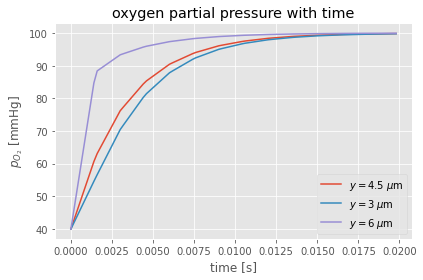

In [ ]:
plt.figure()
plt.title('oxygen partial pressure with time')
plt.ylabel(r'$p_{O_2}$ [mmHg]')
plt.xlabel(r'time [s]')
plt.plot(
    quarter["arc_length"][:100]/1000, quarter["p_O2"][:100],
    label=r'$y=4.5 \; \mu$m'
)
plt.plot(
    middle["arc_length"][:100]/1000, middle["p_O2"][:100],
    label=r'$y=3 \; \mu$m'
)
plt.plot(
    top["arc_length"][:100]/1000, top["p_O2"][:100],
    label=r'$y=6 \; \mu$m'
)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join('../results-data/', folder, 'po2_time.pdf'))